## Частина третя: Аналіз датасет c Kaggle.com

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

* Прочитайте csv файл (використовуйте функцію read_csv)
* Виведіть перші п'ять рядків (використовується функція head)

In [2]:
file_data = pd.read_csv("bestsellers with categories.csv")
file_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


* Виведіть розміри датасету (використовуйте атрибут shape)

In [3]:
print(f"Result: {file_data.shape[0]} rows x {file_data.shape[1]} columns")
print(f"\nПро скільки книг зберігає дані датасет? Відповідь: {file_data.shape[0]}")

Result: 550 rows x 7 columns

Про скільки книг зберігає дані датасет? Відповідь: 550


In [4]:
file_data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
file_data.head(1)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction


### Первинне дослідження даних

* Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [5]:
print(file_data.isnull().sum(axis=0))
print(f"\nЧи є в якихось змінних пропуски? Відповідь: {'Так' if file_data.isnull().sum().sum() else 'Ні'}")

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? Відповідь: Ні


* Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [6]:
uniq_ganres = list(np.sort(file_data["genre"].unique()))
print(f"Які є унікальні жанри? Відповідь: {', '.join(uniq_ganres) if uniq_ganres else 'немає ніяких'}")

Які є унікальні жанри? Відповідь: Fiction, Non Fiction


* Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

<Axes: xlabel='Price', ylabel='Frequency'>

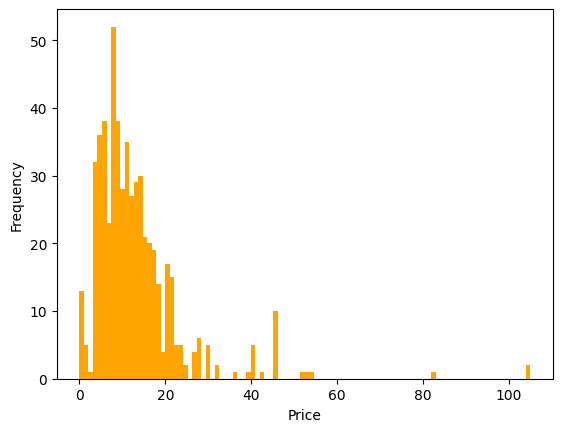

In [7]:
file_data["price"].plot(kind="hist", bins=100, xlabel="Price", ylabel="Frequency", color="orange")

* Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [8]:
print(f"Максимальна ціна? Відповідь: {file_data['price'].max()}")
print(f"\nМінімальна ціна? Відповідь: {file_data['price'].min()}")
print(f"\nСередня ціна? Відповідь: {file_data['price'].mean()}")
print(f"\nМедіанна ціна? Відповідь: {file_data['price'].median()}")

Максимальна ціна? Відповідь: 105

Мінімальна ціна? Відповідь: 0

Середня ціна? Відповідь: 13.1

Медіанна ціна? Відповідь: 11.0


### Пошук та сортування даних

In [9]:
max_rating = file_data["user_rating"].max()
print(f"Який рейтинг у датасеті найвищий? Відповідь: {max_rating}")

mr_books_qty = len(file_data.query(f"user_rating == {max_rating}"))
print(f"\nСкільки книг мають такий рейтинг? Відповідь: {mr_books_qty}")

top_book = file_data.iloc[file_data["reviews"].idxmax()]
print(f"\nЯка книга має найбільше відгуків? Відповідь: \"{top_book['name']}\" by {top_book['author']}")

try:  # приклад обробки помилок 
    qst_str = "\nЗ тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь:"
    exp_2015 = file_data.iloc[file_data.query("year == 2015")["price"].idxmax()]
except IndexError:
    print(f"{qst_str} в Топ-50 немає книг 2015 року.")
else:
    print(f"{qst_str} \"{exp_2015['name']}\" by {exp_2015['author']}")
    
qty_fiction_2010 = len(file_data.query(f"year == 2010 & genre == 'Fiction'"))     
print(f"\nСкільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: {qty_fiction_2010}")

qty_books = len(file_data.query(f"user_rating == 4.9 & (year == 2010 | year == 2011)"))
print(f"\nСкільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: {qty_books}")

# вибачте - навмисно не став сортувати ascending=True як сказано в ТЗ
books_2015 = file_data.query("year == 2015 & price < 8").sort_values(by=["price"], ascending=False).iloc[0]
print(f"\nЯка книга остання у відсортованому списку? Відповідь: \"{books_2015['name']}\" by {books_2015['author']}")


Який рейтинг у датасеті найвищий? Відповідь: 4.9

Скільки книг мають такий рейтинг? Відповідь: 52

Яка книга має найбільше відгуків? Відповідь: "Where the Crawdads Sing" by Delia Owens

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: "Publication Manual of the American Psychological Association, 6th Edition" by American Psychological Association

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1

Яка книга остання у відсортованому списку? Відповідь: "Old School (Diary of a Wimpy Kid #10)" by Jeff Kinney


### Агрегування даних та з'єднання таблиць

* Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів 

In [10]:
df_tmp = file_data.groupby("genre").agg({"price": ["min", "max"]})
df_tmp.columns = ["price_min", "price_max"]

print(f"Максимальна ціна для жанру Fiction: Відповідь: {df_tmp.loc['Fiction']['price_max']}")
print(f"\nМінімальна ціна для жанру Fiction: Відповідь: {df_tmp.loc['Fiction']['price_min']}")
print(f"\nМаксимальна ціна для жанру Non Fiction: Відповідь: {df_tmp.loc['Non Fiction']['price_max']}")
print(f"\nМінімальна ціна для жанру Non Fiction: Відповідь: {df_tmp.loc['Non Fiction']['price_min']}")

Максимальна ціна для жанру Fiction: Відповідь: 82

Мінімальна ціна для жанру Fiction: Відповідь: 0

Максимальна ціна для жанру Non Fiction: Відповідь: 105

Мінімальна ціна для жанру Non Fiction: Відповідь: 0


* Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (use Series)

In [11]:
serie_tmp = file_data.groupby("author")["author"].agg("count")
print(f"Якої розмірності вийшла таблиця? Відповідь: {serie_tmp.shape}")
print(f"\nЯкий автор має найбільше книг? Відповідь: {serie_tmp.idxmax()}")
print(f"\nСкільки книг цього автора? Відповідь: {serie_tmp[serie_tmp.idxmax()]}")

Якої розмірності вийшла таблиця? Відповідь: (248,)

Який автор має найбільше книг? Відповідь: Jeff Kinney

Скільки книг цього автора? Відповідь: 12


* Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (use DataFrame)

In [12]:
df_tmp = file_data.groupby("author").agg({"author": ["count"]})
df_tmp.columns = ["books_count"]
author = df_tmp["books_count"].idxmax()
books_count = df_tmp.loc[author]["books_count"] 
print(f"Якої розмірності вийшла таблиця? Відповідь: {df_tmp.shape}")
print(f"\nЯкий автор має найбільше книг? Відповідь: {author}")
print(f"\nСкільки книг цього автора? Відповідь: {books_count}")

Якої розмірності вийшла таблиця? Відповідь: (248, 1)

Який автор має найбільше книг? Відповідь: Jeff Kinney

Скільки книг цього автора? Відповідь: 12


* Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора

In [13]:
df_tmp1 = file_data.groupby("author").agg({"user_rating": ["mean"]})
df_tmp1.columns = ["mean_rating"]
author = df_tmp1["mean_rating"].idxmin()
mean_rating = df_tmp1.loc[author]["mean_rating"] 
print(f"У якого автора середній рейтинг мінімальний? Відповідь: {author}")
print(f"\nЯкий у цього автора середній рейтинг? Відповідь: {mean_rating}")


У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

Який у цього автора середній рейтинг? Відповідь: 3.9


* З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

* Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [14]:
union_df = pd.concat([df_tmp, df_tmp1], axis=1)
union_df.sort_values(by=["books_count", "mean_rating"], inplace=True)
union_df.head()

,books_count,mean_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2


In [15]:
print(f"Який автор перший у списку? Відповідь: {union_df.index[0]}")

Який автор перший у списку? Відповідь: Muriel Barbery


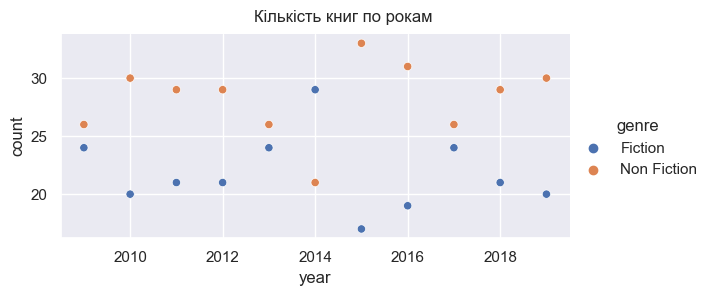

In [16]:
plot_data1 = file_data.groupby(by=["year", "genre"]).agg({"name": ["count"]})
plot_data1 = plot_data1.reset_index()  
plot_data1.columns = ["year", "genre", "count"]

sns.set_theme()
g = sns.relplot(
    data=plot_data1,
    x="year", y="count", height=3, aspect=2, hue='genre'
)
g.fig.suptitle("Кількість книг по рокам", fontsize=12)
g.fig.subplots_adjust(top=0.9);

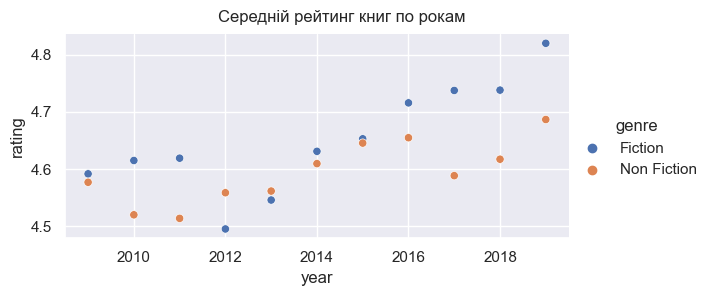

In [17]:
plot_data2 = file_data.groupby(by=["year", "genre"]).agg({"user_rating": ["mean"]})
plot_data2 = plot_data2.reset_index()  
plot_data2.columns = ["year", "genre", "rating"]

sns.set_theme()
g = sns.relplot(
    data=plot_data2,
    x="year", y="rating", height=3, aspect=2, hue='genre'
)
g.fig.suptitle("Середній рейтинг книг по рокам", fontsize=12)
g.fig.subplots_adjust(top=0.9);

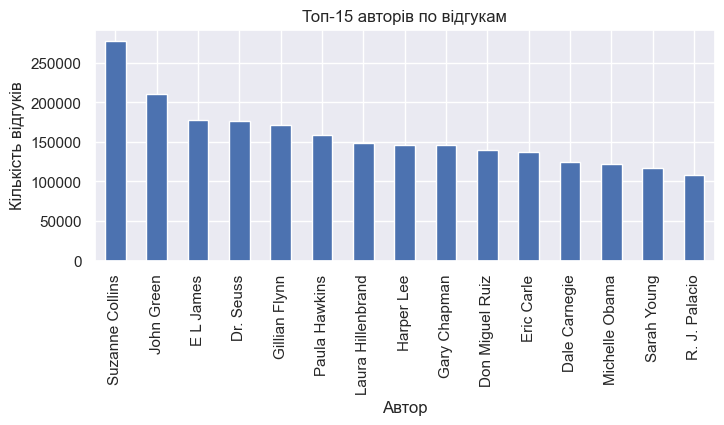

In [18]:
plot_data3 = file_data.groupby(by=["author"])["reviews"].sum()
plot_data3.sort_values(ascending=False, inplace=True)
plot_data3 = plot_data3[:15]

fig, ax = plt.subplots(figsize=(8, 3))
plot_data3.plot(kind="bar", ax=ax)
ax.set_title("Топ-15 авторів по відгукам")
ax.set_ylabel("Кількість відгуків")
ax.set_xlabel("Автор");
